In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD

Using TensorFlow backend.


In [3]:
df=pd.read_csv('data/housing-data.csv')

In [4]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


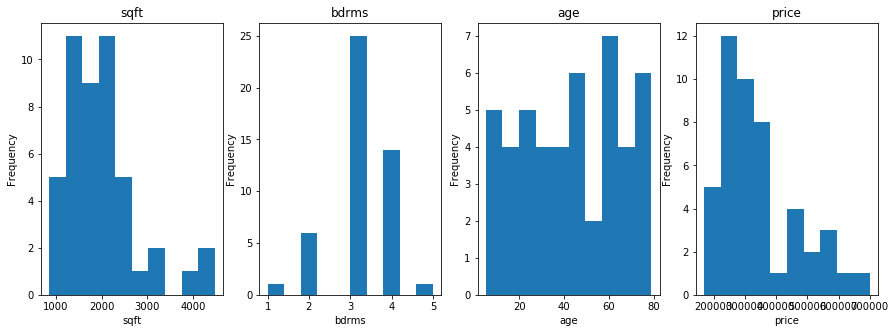

In [5]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [6]:
df


,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900
5,1985,4,61,299900
6,1534,3,12,314900
7,1427,3,57,198999
8,1380,3,14,212000
9,1494,3,15,242500


In [23]:
X=df.as_matrix(columns=df.columns[0:3])
X

array([[2104,    3,   70],
       [1600,    3,   28],
       [2400,    3,   44],
       [1416,    2,   49],
       [3000,    4,   75],
       [1985,    4,   61],
       [1534,    3,   12],
       [1427,    3,   57],
       [1380,    3,   14],
       [1494,    3,   15],
       [1940,    4,    7],
       [2000,    3,   27],
       [1890,    3,   45],
       [4478,    5,   49],
       [1268,    3,   58],
       [2300,    4,   77],
       [1320,    2,   62],
       [1236,    3,   78],
       [2609,    4,    5],
       [3031,    4,   21],
       [1767,    3,   44],
       [1888,    2,   79],
       [1604,    3,   13],
       [1962,    4,   53],
       [3890,    3,   36],
       [1100,    3,   60],
       [1458,    3,   29],
       [2526,    3,   13],
       [2200,    3,   28],
       [2637,    3,   25],
       [1839,    2,   40],
       [1000,    1,    5],
       [2040,    4,   75],
       [3137,    3,   67],
       [1811,    4,   24],
       [1437,    3,   50],
       [1239,    3,   22],
 

In [26]:
y=df['price'].values
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500], dtype=int64)

In [30]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [33]:
X_train


array([[2609,    4,    5],
       [3137,    3,   67],
       [1236,    3,   78],
       [1239,    3,   22],
       [2567,    4,   57],
       [2526,    3,   13],
       [1534,    3,   12],
       [2238,    3,   37],
       [1985,    4,   61],
       [1767,    3,   44],
       [1494,    3,   15],
       [1888,    2,   79],
       [1600,    3,   28],
       [1839,    2,   40],
       [1940,    4,    7],
       [1437,    3,   50],
       [2162,    4,   43],
       [2132,    4,   28],
       [1100,    3,   60],
       [1458,    3,   29],
       [2104,    3,   70],
       [2200,    3,   28],
       [2040,    4,   75],
       [4478,    5,   49],
       [1200,    3,   76],
       [1000,    1,    5],
       [1380,    3,   14],
       [3000,    4,   75],
       [2400,    3,   44],
       [1416,    2,   49],
       [1852,    4,   64],
       [2300,    4,   77],
       [1268,    3,   58],
       [ 852,    2,   70],
       [1962,    4,   53],
       [4215,    4,   66],
       [1604,    3,   13]], 

In [34]:
model.fit(X_train, y_train)


Epoch 1/10
37/37 [==============================] - 0s - loss: 127773361456.4324     
Epoch 2/10
37/37 [==============================] - 0s - loss: 125319407560.6487     
Epoch 3/10
37/37 [==============================] - 0s - loss: 122996100123.6757     
Epoch 4/10
37/37 [==============================] - 0s - loss: 120657250691.4594     
Epoch 5/10
37/37 [==============================] - 0s - loss: 118321481894.0541     
Epoch 6/10
37/37 [==============================] - 0s - loss: 116061008868.3243     
Epoch 7/10
37/37 [==============================] - 0s - loss: 113741243032.2162     
Epoch 8/10
37/37 [==============================] - 0s - loss: 111434846540.1081    
Epoch 9/10
37/37 [==============================] - 0s - loss: 109168729004.9730    
Epoch 10/10
37/37 [==============================] - 0s - loss: 107040287328.8649     


In [35]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [36]:
df['sqft1000']=df['sqft']/1000

In [37]:
df['age10'] = df['age']/10.0
df['price100k'] = df['price']/1e5

In [38]:
X = df[['sqft1000', 'bdrms', 'age10']].values
y = df['price100k'].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.compile(Adam(lr=0.1), 'mean_squared_error')
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
37/37 [==============================] - 0s - loss: 36.8067     
Epoch 2/20
37/37 [==============================] - 0s - loss: 16.2477     
Epoch 3/20
37/37 [==============================] - 0s - loss: 5.0260     
Epoch 4/20
37/37 [==============================] - 0s - loss: 1.5358     
Epoch 5/20
37/37 [==============================] - 0s - loss: 3.6389     
Epoch 6/20
37/37 [==============================] - 0s - loss: 6.4296     
Epoch 7/20
37/37 [==============================] - 0s - loss: 7.0127     
Epoch 8/20
37/37 [==============================] - 0s - loss: 5.4605     
Epoch 9/20
37/37 [==============================] - 0s - loss: 3.1301     
Epoch 10/20
37/37 [==============================] - 0s - loss: 1.6189     
Epoch 11/20
37/37 [==============================] - 0s - loss: 1.0039     
Epoch 12/20
37/37 [==============================] - 0s - loss: 1.3327     
Epoch 13/20
37/37 [==============================] - 0s - loss: 1.8449     
Epoch 14/20
37/37 [

In [42]:
from sklearn.metrics import r2_score
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.354
The R2 score on the Test set is:	0.644


In [45]:
#improving the model by changing 
model.fit(X_train, y_train, epochs=40,verbose=0)

In [51]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	-15.761
The R2 score on the Test set is:	-6.659


NameError: name 'Adamax' is not defined

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').